In [1]:
import numpy as np

Before continuing, I'm just going to take a minute to state some important things to consider. Our original function for the velocity is
\begin{equation}
   \vec{u} = \frac{k}{r}{\hat{\phi}}.
\end{equation}
However, given that we are working in cartesian coordinates, it will be helpful to express the above equation in terms of an $x$ and $y$ component. Using polar coordinates, we know that 

\begin{equation}
   \vec{u} = \frac{k}{\sqrt{x^2 + y^2}}(-\text{sin}\phi\hat{x} + \text{cos}\phi\hat{y}).
\end{equation}
Knowing this, we can calculate the $x$ and $y$ velocities. 

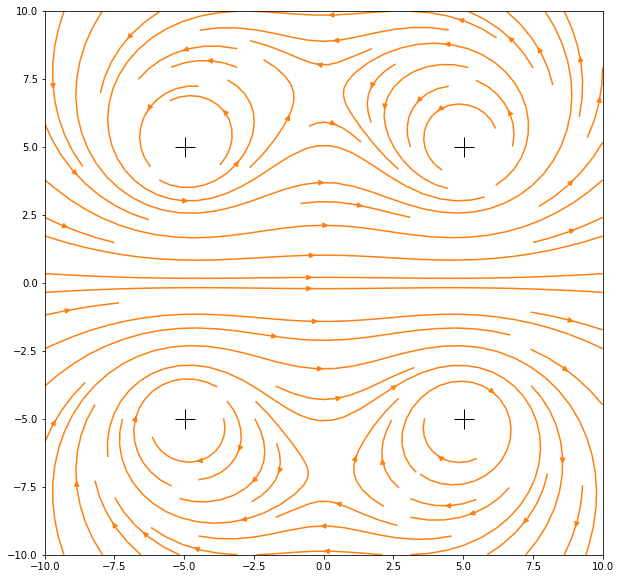

KeyboardInterrupt: 

In [3]:
"""
Description

@author: Mattias Lazda
@collab: Jules Faucher, David Tucci

Feb 4, 2022
"""
import numpy as np
import matplotlib.pyplot as pl

# Set number of steps and time step
dt = 0.1
Nsteps = 100

# Setting up initial conditions
y_v = np.array([5,5,-5,-5])
x_v = np.array([-5,5,-5,5])
k_v = np.array([1,1,-1,-1])

# Setting up the plot
pl.ion()
fig, ax = pl.subplots(1,1, figsize=(10,10))
# Mark the initial positions of the vortices
p, = ax.plot(x_v, y_v, 'k+', markersize=20)

# Draw the initial velocity streamline
ngrid = 10
Y,X = np.mgrid[-ngrid:ngrid:360j, -ngrid:ngrid:360j]
vel_x = np.zeros(np.shape(X)) # this holds x-velocities
vel_y = np.zeros(np.shape(Y)) # this holds y-velocities

# Masking radius for better visualization of the vortex centres
r_mask = 1


for i in range(len(x_v)):
    
    # Get x and y distance from source
    x_diff = X - x_v[i]
    y_diff = Y - y_v[i]

    # Calculate r
    r = np.sqrt(np.power(x_diff,2) + np.power(y_diff, 2))
    
    
    # Compute x and y velocities due to vortex located at x_i, y_i
    vel_x_temp = k_v[i] * (-y_diff) / r**2
    vel_y_temp = k_v[i] * (x_diff) / r**2

    
    # Add to the total velocity field 
    vel_x += vel_x_temp
    vel_y += vel_y_temp
    
    # Determine indices of range around the origin
    
    vel_x[r <= r_mask ] = np.nan
    vel_y[r <= r_mask ] = np.nan


# Set boundaries of the simulation box
ax.set_xlim([-ngrid, ngrid])
ax.set_ylim([-ngrid, ngrid])

# Initial plot of the streamlines
ax.streamplot(X, Y, vel_x, vel_y, density = [1,1])


fig.canvas.draw()

# Evolution
count = 0

while count < Nsteps: 
    
    # Re-initialize velocity field 
    vel_x = np.zeros(np.shape(X)) 
    vel_y = np.zeros(np.shape(Y)) 

    
    adv_vel_x = np.zeros(len(x_v))
    adv_vel_y = np.zeros(len(x_v))
    
    indices = np.arange(len(x_v))
    
    for i in indices:
        
        index_use = indices[indices!=i]
        
        adv_vel_x_i = 0
        adv_vel_y_i = 0
        
        for j in index_use: 
            
            x_diff_j = x_v[i] - x_v[j]
            y_diff_j = y_v[i] - y_v[j]
            
            r = np.sqrt(np.power(x_diff_j,2) + np.power(y_diff_j, 2))

            # Compute x and y velocities due to vortex located at x_i, y_i
            adv_vel_x[i] += k_v[j] * (-y_diff_j) / r**2
            adv_vel_y[i] += k_v[j] * (x_diff_j) / r**2
        
        
    # Update positions of vortices 
    
    x_v = x_v + dt*adv_vel_x
    y_v = y_v + dt*adv_vel_y
    
    
    # Get updated velocity field
    for i in range(len(x_v)):
    
        # Get x and y distance from source
        x_diff = X - x_v[i]
        y_diff = Y - y_v[i]

        # Calculate r
        r = np.sqrt(np.power(x_diff,2) + np.power(y_diff, 2))


        # Compute x and y velocities due to vortex located at x_i, y_i
        vel_x_temp = k_v[i] * (-y_diff) / r**2
        vel_y_temp = k_v[i] * (x_diff) / r**2


        # Add to the total velocity field 
        vel_x += vel_x_temp
        vel_y += vel_y_temp

        # Determine indices of range around the origin

        vel_x[r <= r_mask ] = np.nan
        vel_y[r <= r_mask ] = np.nan
    
    # Update plot of the streamlines
        
    # Clear previous streamlines 
    ax.collections = []
    ax.patches = []
    
    p.set_xdata(x_v)
    p.set_ydata(y_v)
    
    ax.streamplot(X,Y,vel_x,vel_y, density = [1,1])
    
    fig.canvas.draw()
    pl.pause(0.001)
    count+=1
        
     